<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de librerias

In [ ]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

Importacion del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!



# Analisis inicial de los datos

In [ ]:
print("Distribución del valor de equipamiento inicial:")
print(data['RoundStartingEquipmentValue'].describe())

Distribución del valor de equipamiento inicial:
count    79157.000000
mean      3778.108695
std       2111.285406
min          0.000000
25%       1600.000000
50%       4700.000000
75%       5200.000000
max       8850.000000
Name: RoundStartingEquipmentValue, dtype: float64


Visualizacion de la distribución


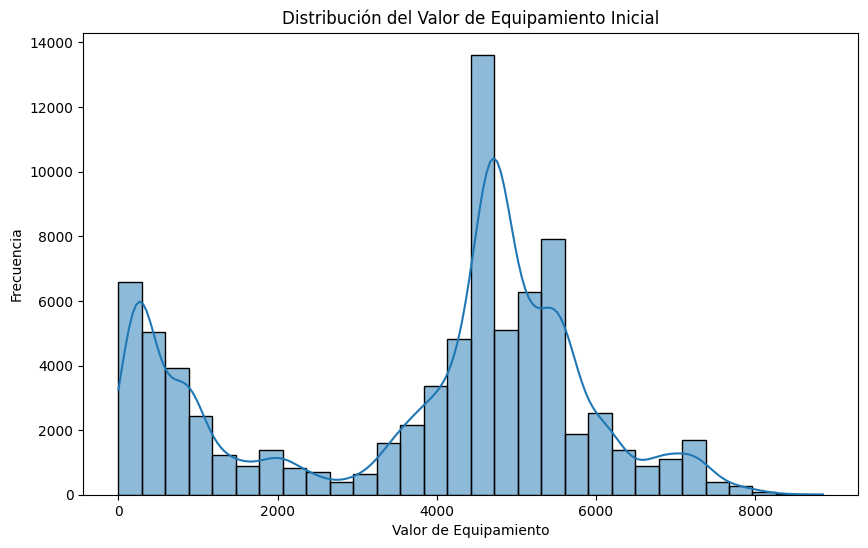

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RoundStartingEquipmentValue'], bins=30, kde=True)
plt.title('Distribución del Valor de Equipamiento Inicial')
plt.xlabel('Valor de Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

Distribucion de las variables

In [ ]:
# Variable objetivo
Y = data['RoundStartingEquipmentValue']


[7]
# Variable objetivo
Y = data['RoundStartingEquipmentValue']

# Variables predictoras
X = data[['TeamStartingEquipmentValue', 'RoundId']]

# Variables predictoras
X = data[['TeamStartingEquipmentValue', 'RoundId']]

Distribucion de los tamaños de entrenamiento y prueba

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (55409, 2)
Tamaño del conjunto de prueba: (23748, 2)


Creacion del modelo

In [ ]:
# Crear el modelo
reg_tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
reg_tree.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=42)

Calcular metricas

In [ ]:
# Predecir
Y_pred = reg_tree.predict(X_test)

# Calcular métricas
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


RMSE: 970.69
R²: 0.79


Visualizar el modelo

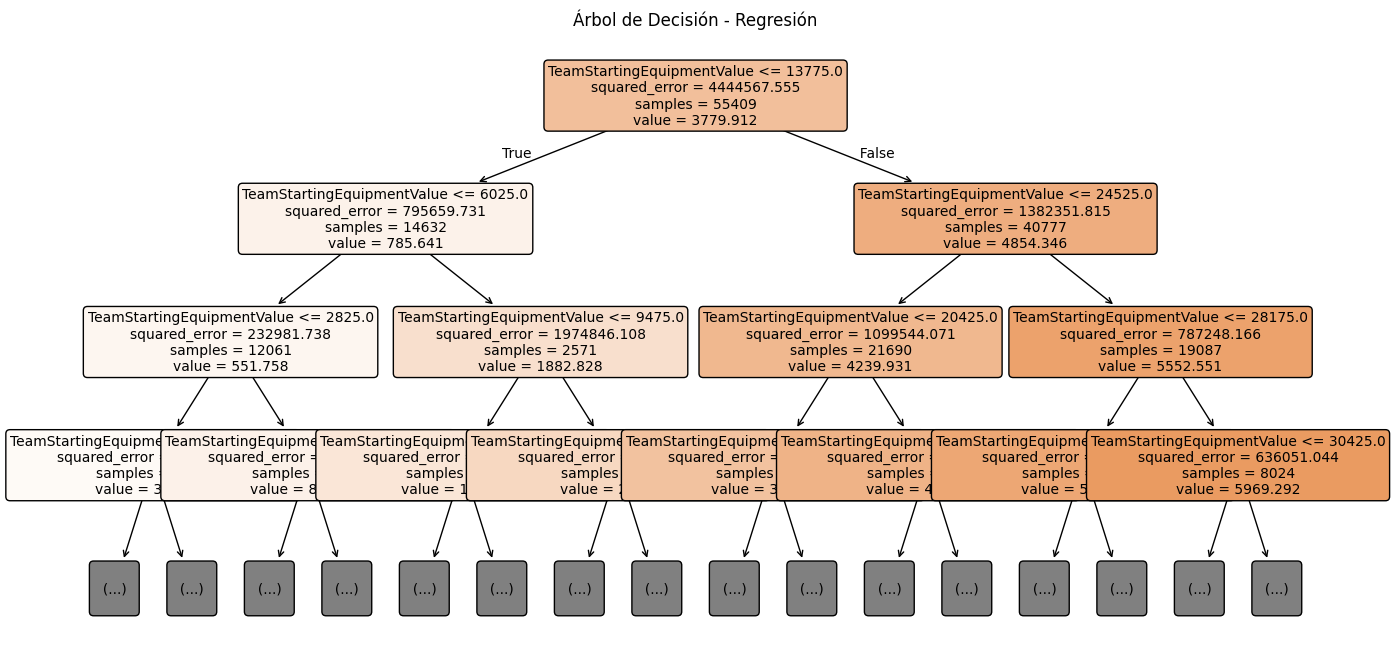

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(
    reg_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,  # Solo los primeros niveles para que se vea más claro
    fontsize=10
)
plt.title('Árbol de Decisión - Regresión')
plt.show()


# Evaluar otros modelos de decision tree

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

Ocupar mas datos para la evaluacion del modelos como mo2 YHAT y mae

In [ ]:


mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)


#Mean square error(promedio error cuadrados)
mse = mean_squared_error(Ytest, Yhat)
#Mean absoluto error (Cuanto se equivoca)
mae = mean_absolute_error(Ytest, Yhat)
#Coieficiente de determinacion (Cuanto predice bien)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  968438.3282870799
MAE:  610.630674244261
R^2:  0.7816853369671222


In [ ]:
mo2.feature_importances_

array([0.99388027, 0.00611973])

In [ ]:
Xtrain.columns

Index(['TeamStartingEquipmentValue', 'RoundId'], dtype='object')

# SEPARACION


In [ ]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.849498325580148
{'max_depth': np.int64(5), 'min_samples_split': np.int64(2)}


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032084,0.003193,0.004036,0.001380,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.829705,0.838308,0.840524,0.834304,0.834075,0.844447,0.839440,0.842195,0.851457,0.837969,0.839242,0.005755,7
1,0.034257,0.002959,0.003609,0.000181,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.829705,0.838308,0.840524,0.834304,0.834075,0.844447,0.839440,0.842195,0.851457,0.837969,0.839242,0.005755,7
2,0.025511,0.006933,0.002887,0.000774,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.829705,0.838308,0.840524,0.834304,0.834075,0.844447,0.839440,0.842195,0.851457,0.837969,0.839242,0.005755,7
3,0.027175,0.002300,0.002479,0.000111,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.839115,0.845624,0.847681,0.842152,0.843711,0.851284,0.846954,0.850637,0.858962,0.846720,0.847284,0.005223,4
4,0.026219,0.001953,0.002485,0.000079,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.839115,0.845624,0.847681,0.842152,0.843711,0.851284,0.846954,0.850637,0.858962,0.846720,0.847284,0.005223,4
5,0.027775,0.003637,0.002646,0.000413,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.839115,0.845624,0.847681,0.842152,0.843711,0.851284,0.846954,0.850637,0.858962,0.846720,0.847284,0.005223,4
6,0.030895,0.001709,0.002547,0.000136,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.840915,0.847999,0.850760,0.844581,0.846628,0.851546,0.848580,0.853270,0.861123,0.848149,0.849355,0.005157,1
7,0.031490,0.002827,0.002589,0.000257,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.840915,0.847999,0.850760,0.844581,0.846628,0.851546,0.848580,0.853270,0.861123,0.848149,0.849355,0.005157,1
8,0.031576,0.003458,0.002687,0.000397,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.840915,0.847999,0.850760,0.844581,0.846628,0.851546,0.848580,0.853270,0.861123,0.848149,0.849355,0.005157,1


# Escogiendo mejor modelo

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8493551526447651
{'max_depth': np.int64(5), 'min_samples_split': np.int64(2)}


In [ ]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

,6
mean_fit_time,0.046889
std_fit_time,0.003873
mean_score_time,0.003735
std_score_time,0.000463
param_max_depth,5
param_min_samples_split,2
params,"{'max_depth': 5, 'min_samples_split': 2}"
split0_test_score,0.840915
split1_test_score,0.847999
split2_test_score,0.85076


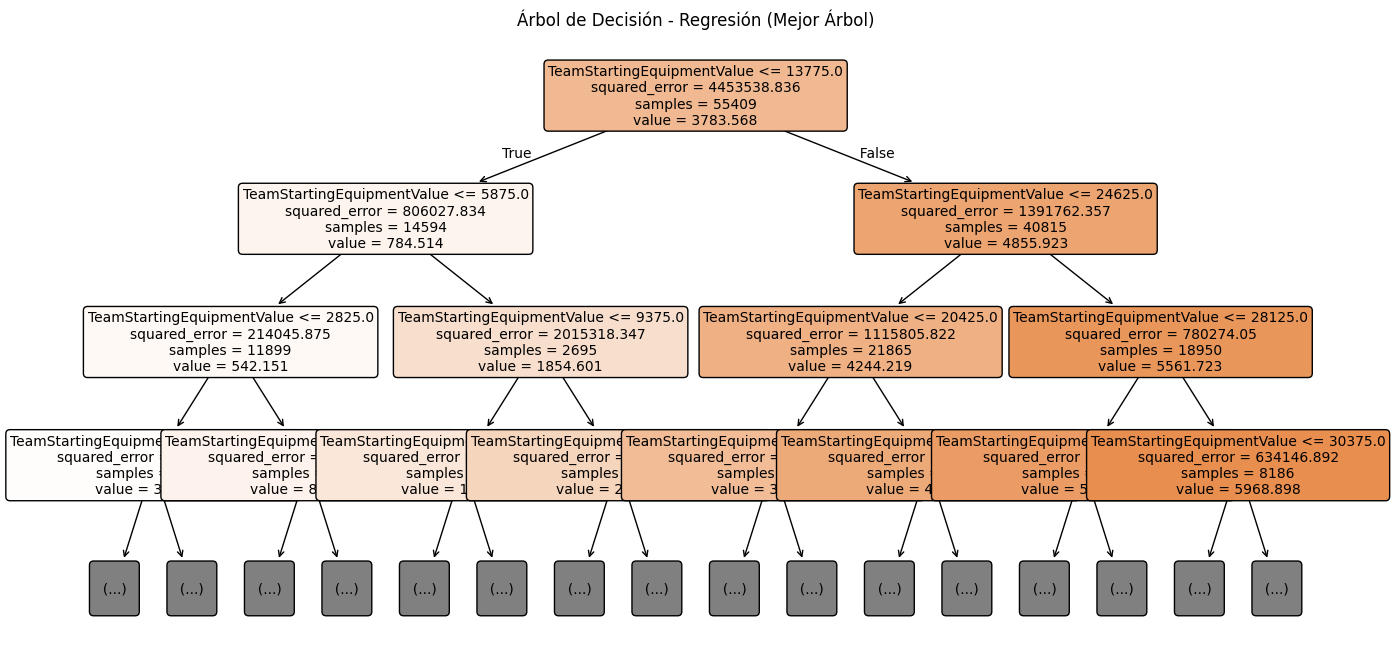

In [ ]:
#Mejor arbol
plt.figure(figsize=(16, 8))
plot_tree(
    grid.best_estimator_,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title('Árbol de Decisión - Regresión (Mejor Árbol)')
plt.show()


Aqui se evaluaron diferentes modelos buscando la primera opcion y despues buscando la mejor opcion dentro de los modelos posibles, osea cual nos daria mejor resultado